# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation

In [2]:
df = pd.read_excel('geo_comment.xlsx')

In [3]:
df.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [5]:
scaler = StandardScaler()

In [6]:
df1 = df[['x', 'y']]
X_scaled = scaler.fit_transform(df1)

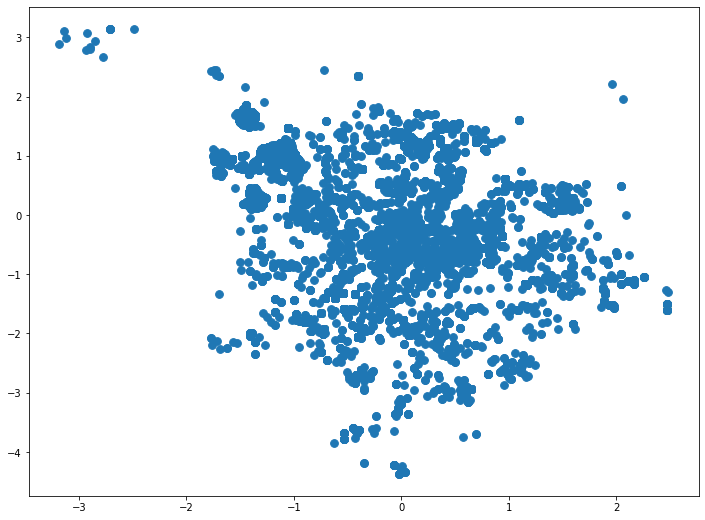

In [7]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=60)

In [8]:
#разделим на 10 кластеров

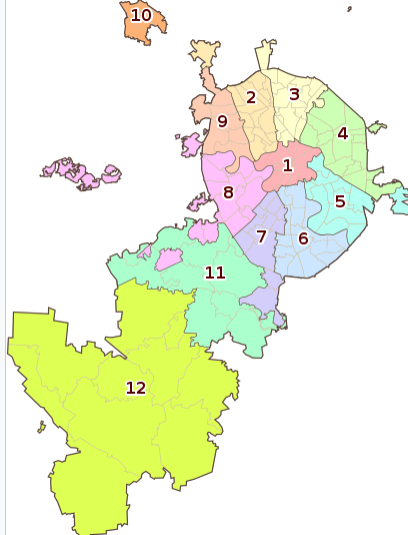

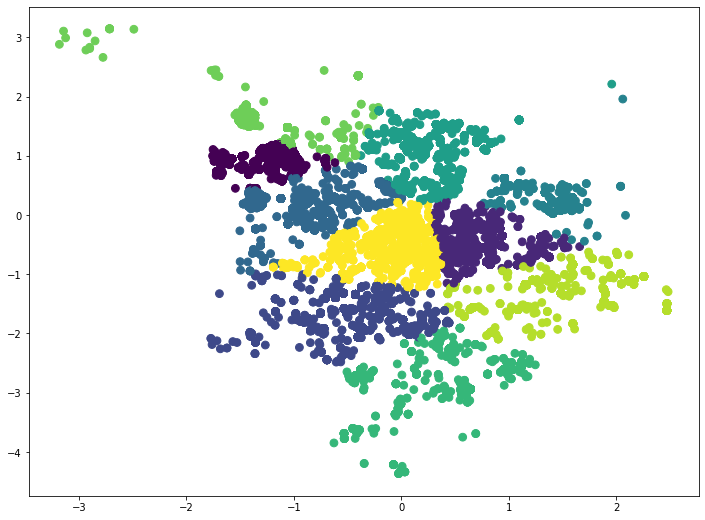

In [9]:
cl = KMeans(n_clusters=10).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [10]:
def find_clasters(X_scaled, model):
    
    k_inertia = []
    ks = range(1,10)

    for k in ks:
        algorithm = model(n_clusters=k)
        clusters_ = algorithm.fit_predict(X_scaled)
        k_inertia.append(algorithm.inertia_)

    plt.plot(ks, k_inertia)
    diff = np.diff(k_inertia)
    diff_r = diff[1:] / diff[:-1]
    k_opt = ks[np.argmin(diff_r)+1]
    print(f"оптимальное количество кластеров: {k_opt}")

оптимальное количество кластеров: 2


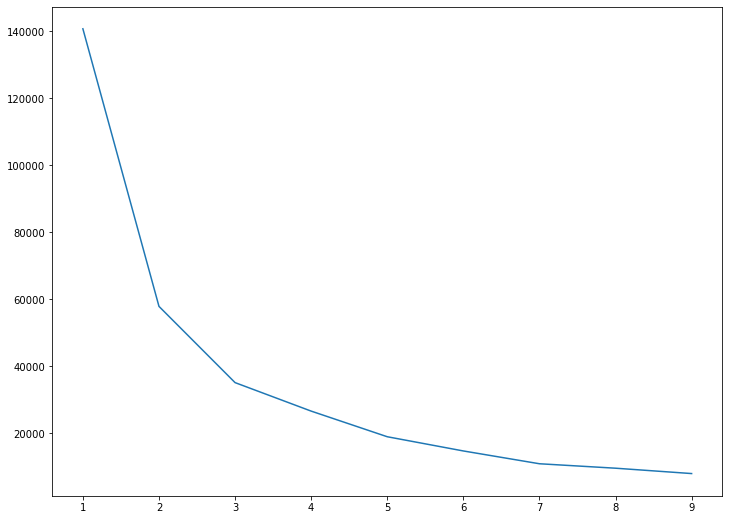

In [11]:
find_clasters(X_scaled, KMeans)

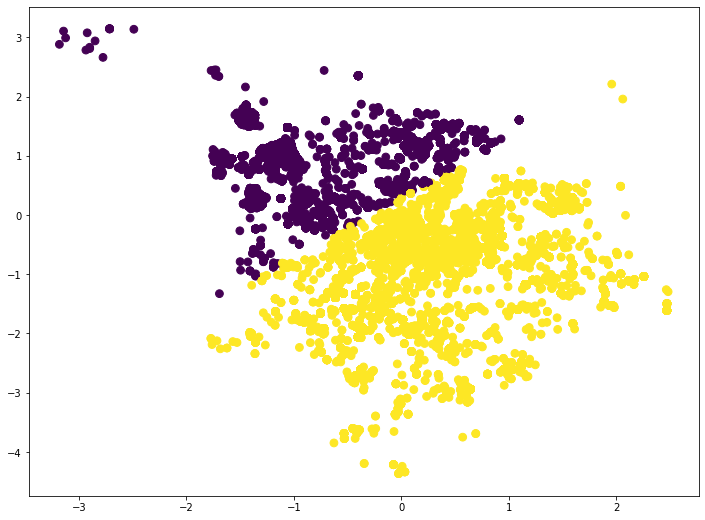

In [12]:
cl = KMeans(n_clusters=2).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [13]:
#выполним те же операции для ответов 'за'
df2 = df[df['comment_class'] == 1][['x', 'y']]
X_scaled = scaler.fit_transform(df2)

оптимальное количество кластеров: 3


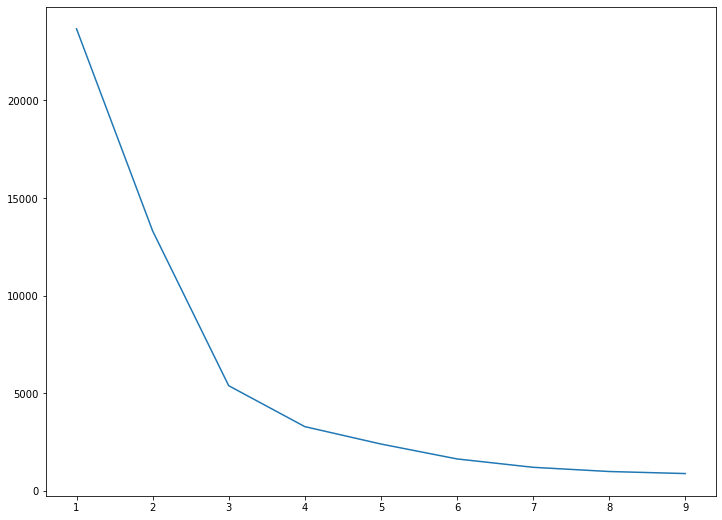

In [14]:
find_clasters(X_scaled, KMeans)

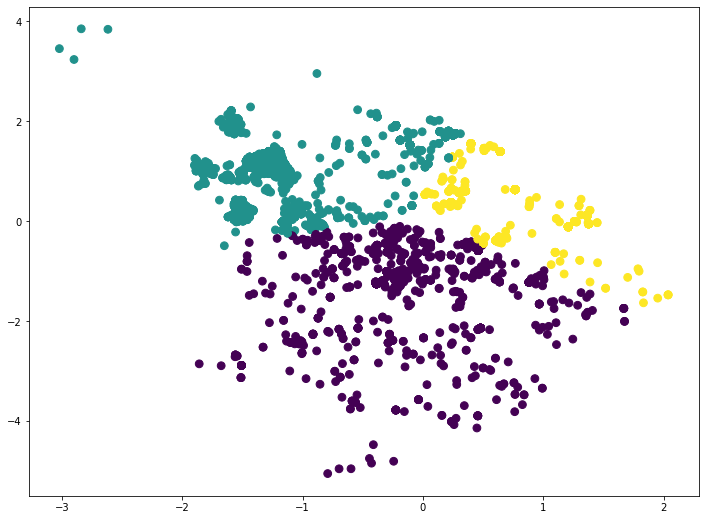

In [15]:
cl = KMeans(n_clusters=3).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

In [16]:
#выполним те же операции для ответов 'против'
df2 = df[df['comment_class'] == -1][['x', 'y']]
X_scaled = scaler.fit_transform(df2)

оптимальное количество кластеров: 2


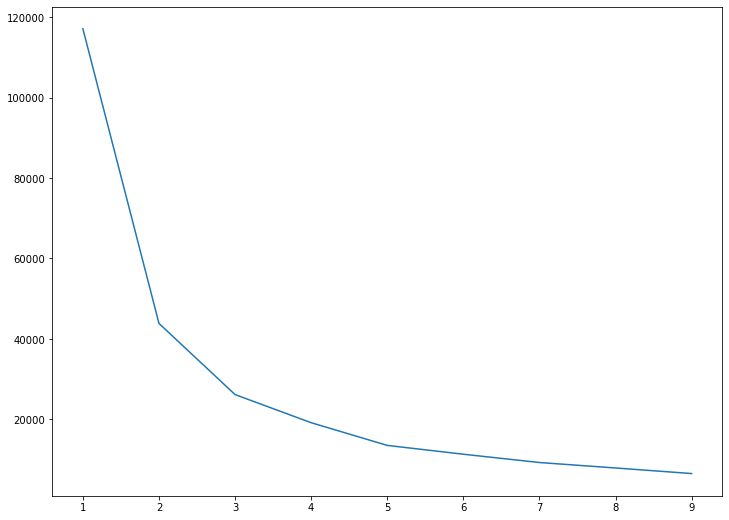

In [17]:
find_clasters(X_scaled, KMeans)

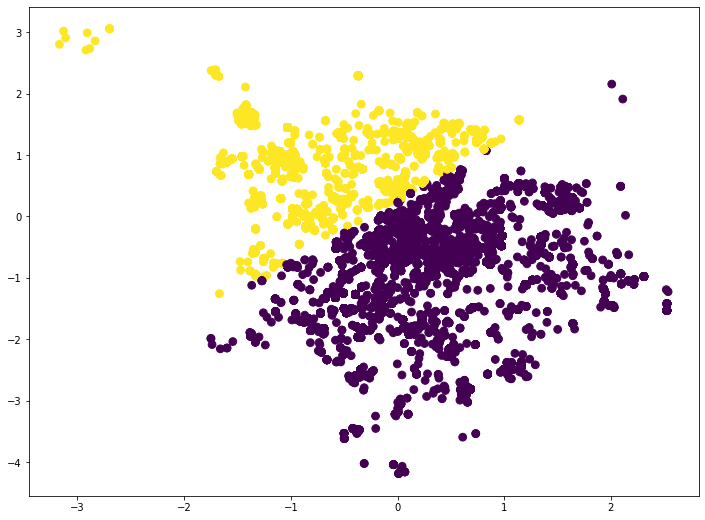

In [18]:
cl = KMeans(n_clusters=2).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [19]:
df1 = df[['x', 'y']]
X_scaled = scaler.fit_transform(df1)

In [20]:
cl = DBSCAN(eps=0.11).fit_predict(X_scaled)

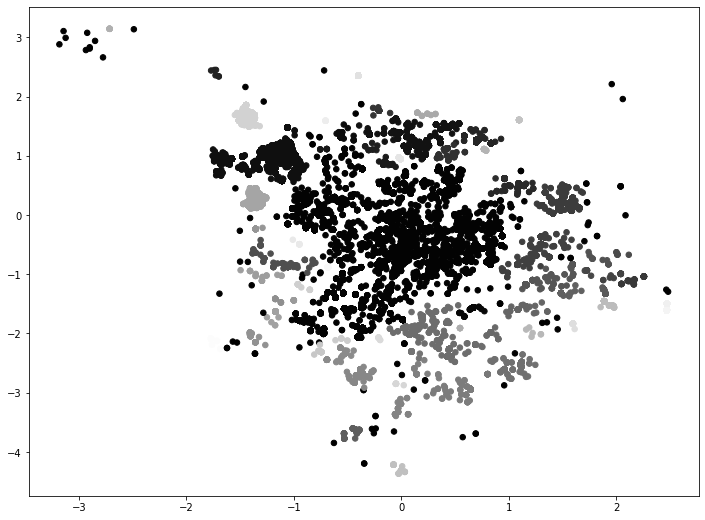

In [21]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=30,cmap='gray')

 наиболее активные в голосовании районы выделены черным цветом

выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

выделим 10 кластеров

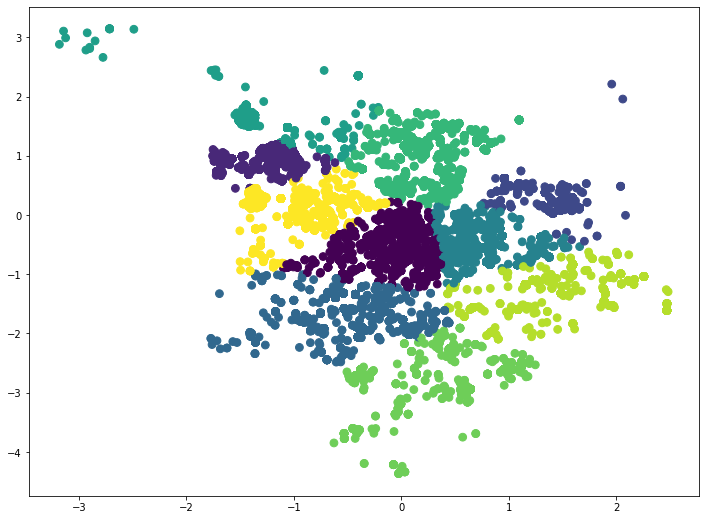

In [22]:
df1 = df[['x', 'y']]
X_scaled = scaler.fit_transform(df1)
cl = KMeans(n_clusters=10).fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],c = cl, s=60)

для каждого кластера сформируем две строки с суммами отзывов за и против

In [23]:
df['cluster'] = cl
df['comment'] = df['comment'] + ' '

In [26]:
all_cl = []
for cl in range(10):
    print(cl)
    fo = df[(df['cluster'] == cl) & (df['comment_class'] == 1)]['comment'].sum()
    print(cl)
    against = df[(df['cluster'] == cl) & (df['comment_class'] == -1)]['comment'].sum()
    all_cl.append([cl, fo, against])

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9


In [27]:
df_cl = pd.DataFrame(all_cl)
df_cl = df_cl.stack().reset_index()
df_cl = df_cl[df_cl['level_1'] != 0]

In [447]:
df_cl.head()

,level_0,level_1,0
1,0,1,Не был осведомлен о месте и времени проведения...
2,0,2,Во все разделы правил землепользования и застр...
4,1,1,С проектом согласен. В посёлке толстопальцево ...
5,1,2,"Считаю, что строительство по адресу: ул.Онежск..."
7,2,1,1) Постановлением Правительства Москвы от 7 ию...


In [62]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [44]:
import re

In [ ]:
# удалим лишние символы, двойные пробелы и слова из одной и двух букв, выполним лемматизацию

In [186]:
documents = []
for sen in range(len(df_cl)):
    print(sen)
    text_df = df_cl[0].iloc[sen]
    
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(text_df))
    
    #удалить слова которые содержат цифры
    document =  re.sub(r'\w*\d\w*', '', document)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    #удалить слова которые состоят из одной или двух букв
    document =  re.sub(r'(\s|^)+\w{1,2}\s+', ' ', document)
    document =  re.sub(r'\s+\w{1,2}\s+', ' ', document)
    document =  re.sub(r'\s+\w{1,2}\s+', ' ', document)
    document =  re.sub(r'\s+\w{1,2}\s+', ' ', document)
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [morph.parse(word)[0].normal_form for word in document]

    documents.append(document)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
# объеденим все слова в одну строчку для каждой группы (кластер + за/против)

In [193]:
j_list = []

for i in documents:
    j_list.append(' '.join(i))

In [238]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
# определим значение TFIDF для слов в каждой группе

In [257]:
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('russian'))

In [258]:
X = tfidfconverter.fit_transform(j_list).toarray()

In [ ]:
# возьмем первые 20 слов с наибольшим значением TFIDF для каждой группы. 
#создадим словари для этих 20 слов где значение будет уменьшаться от 20 до 0 для 20 слов в зависимости от TFIDF

In [265]:
df_words = pd.DataFrame(X)
df_words = df_words.T
df_words['words'] = tfidfconverter.get_feature_names()

In [427]:
def freq_dict(top40):
    fin_str = {}
    for i in range(20):

        fin_str[top40.iloc[i]['words']] = 20-i

    return fin_str

In [429]:
all_dict = []
for i in range(20):
    top40 = df_words.sort_values(by = i, ascending = False)[['words']][:20]
    top40 = top40.reset_index()
    all_dict.append(freq_dict(top40))

In [ ]:
#объеденим словари для каждого кластера для ЗА и ПРОТИВ

In [434]:
merged_dict = []
for i in range(0,20,2):
    merged_dict.append({**all_dict[i], **all_dict[i+1]})

In [ ]:
#выведем облако слов для каждого кластера

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

кластер : 0


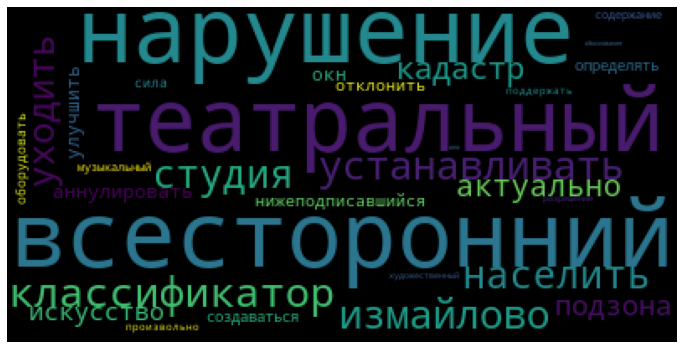

кластер : 1


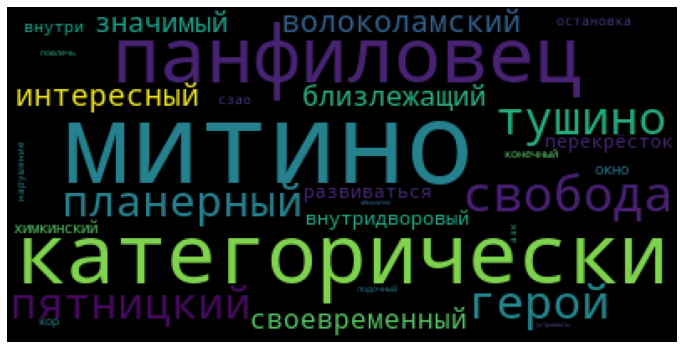

кластер : 2


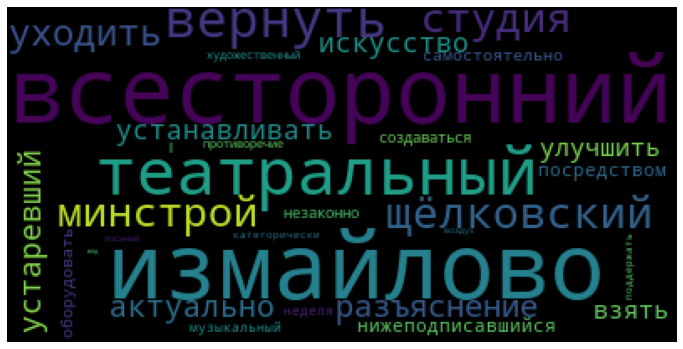

кластер : 3


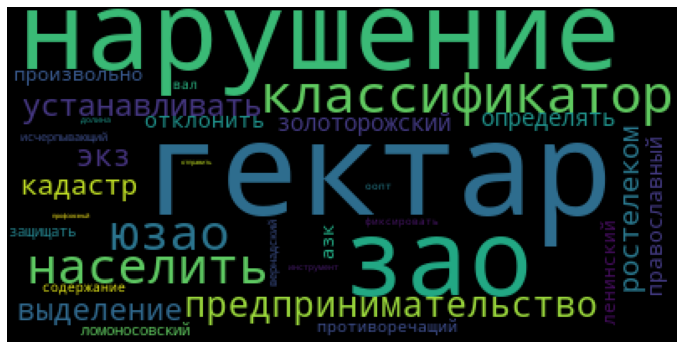

кластер : 4


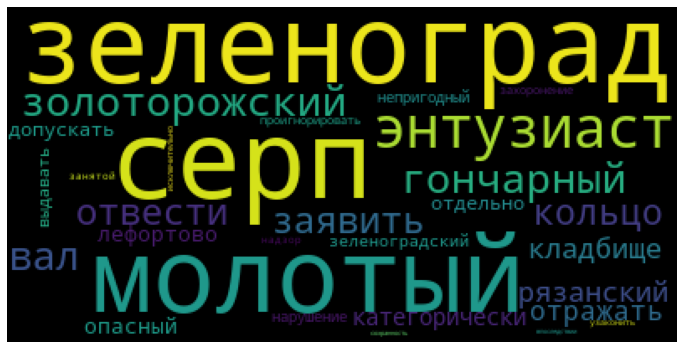

кластер : 5


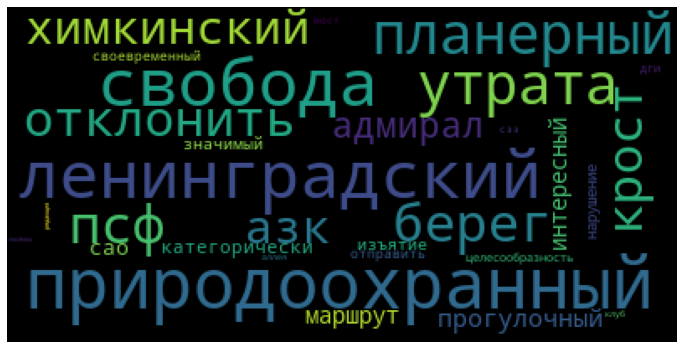

кластер : 6


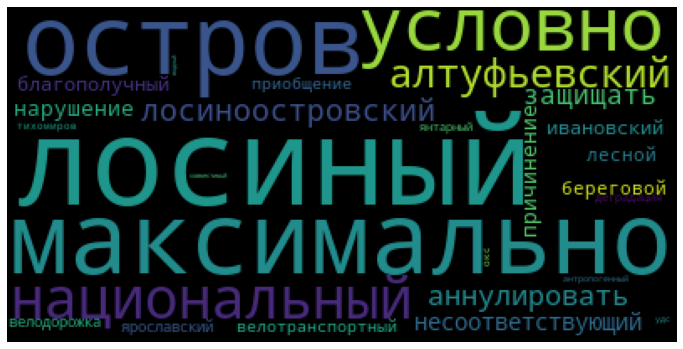

кластер : 7


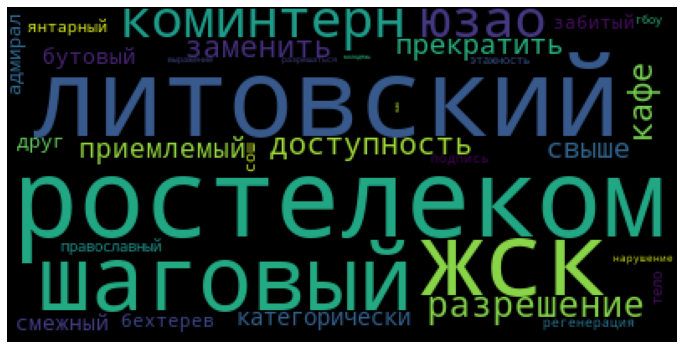

кластер : 8


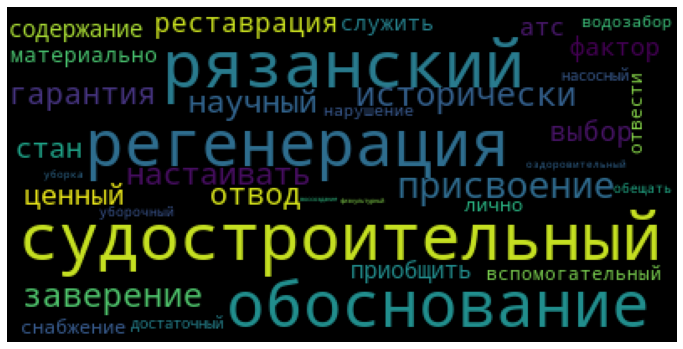

кластер : 9


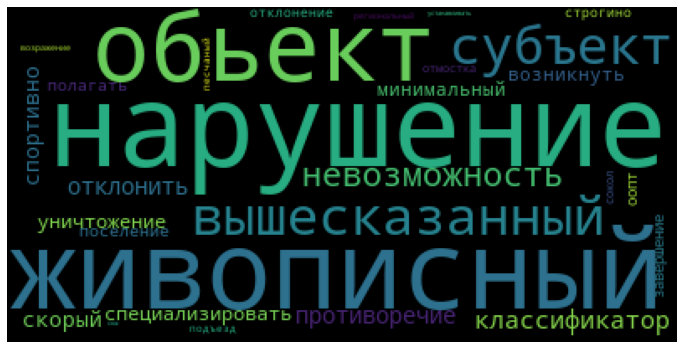

In [445]:
for i in range(10):
    wordcloud = WordCloud(relative_scaling=1).fit_words(merged_dict[i])
    print(f"кластер : {i}")
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [331]:
#посмотрим где расположены кластера на графике

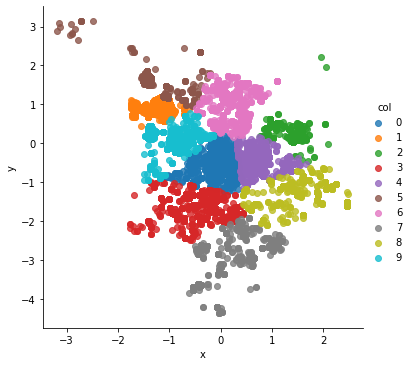

In [392]:
import seaborn as sns

df_sns = pd.DataFrame(X_scaled)
df_sns['col'] = df['cluster']
df_sns.columns = ['x','y','col']


sns.lmplot(x='x', y='y', data=df_sns, hue='col', fit_reg=False)

plt.show()